## Import the libraries

In [46]:
import pandas as pd
import numpy as np
import datetime
import matplotlib as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

from sklearn.preprocessing import Normalizer #SKlearn is the library for machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

## Get the data

In [47]:
df = pd.read_csv("files_for_lab/csv_files/marketing_customer_analysis.csv")
df.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Dealing with the data

### Show dataframe shape

In [48]:
df.shape

(9134, 24)

### Standardize header names

In [49]:
#instead of doing all of this in a function, I am doing it separately to get more practise
#change the columns names to lowercase and replace the spaces with an '_'
df.columns = [df.columns[i].lower().replace(' ', '_') for i in range(len(df.columns))]
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [50]:
#rename the column 'employmentstatus
df = df.rename(columns = {"employmentstatus" : "employment_status"})
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### Check and deal with NaN values

In [51]:
#look at how many of the columns have na as a value
df.isna().sum() 
#no need to dropna as there are none

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

## Explore the data

In [52]:
#plot the variables in pairs
sns.pairplot(df)

In [53]:
#data = df[(df["response"] == "Yes" | (df["response"] == "No"))]
#sns.countplot("coverage", hue = "response", data = data)
#plt.show()
           

In [54]:
#plt.figure(figsize = (12, 8))
sns.countplot("coverage", hue = "response", data = df)


<AxesSubplot:xlabel='coverage', ylabel='count'>

## playing around with EDA, why are so few states shown?

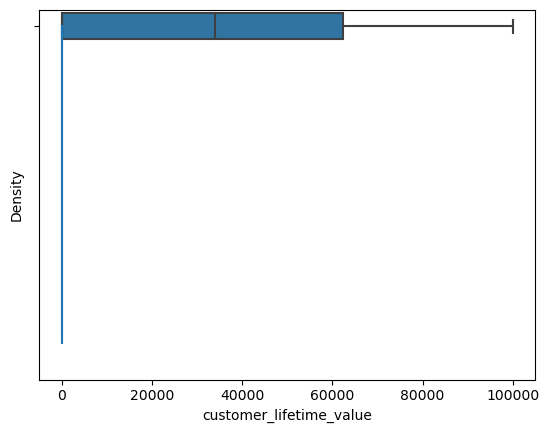

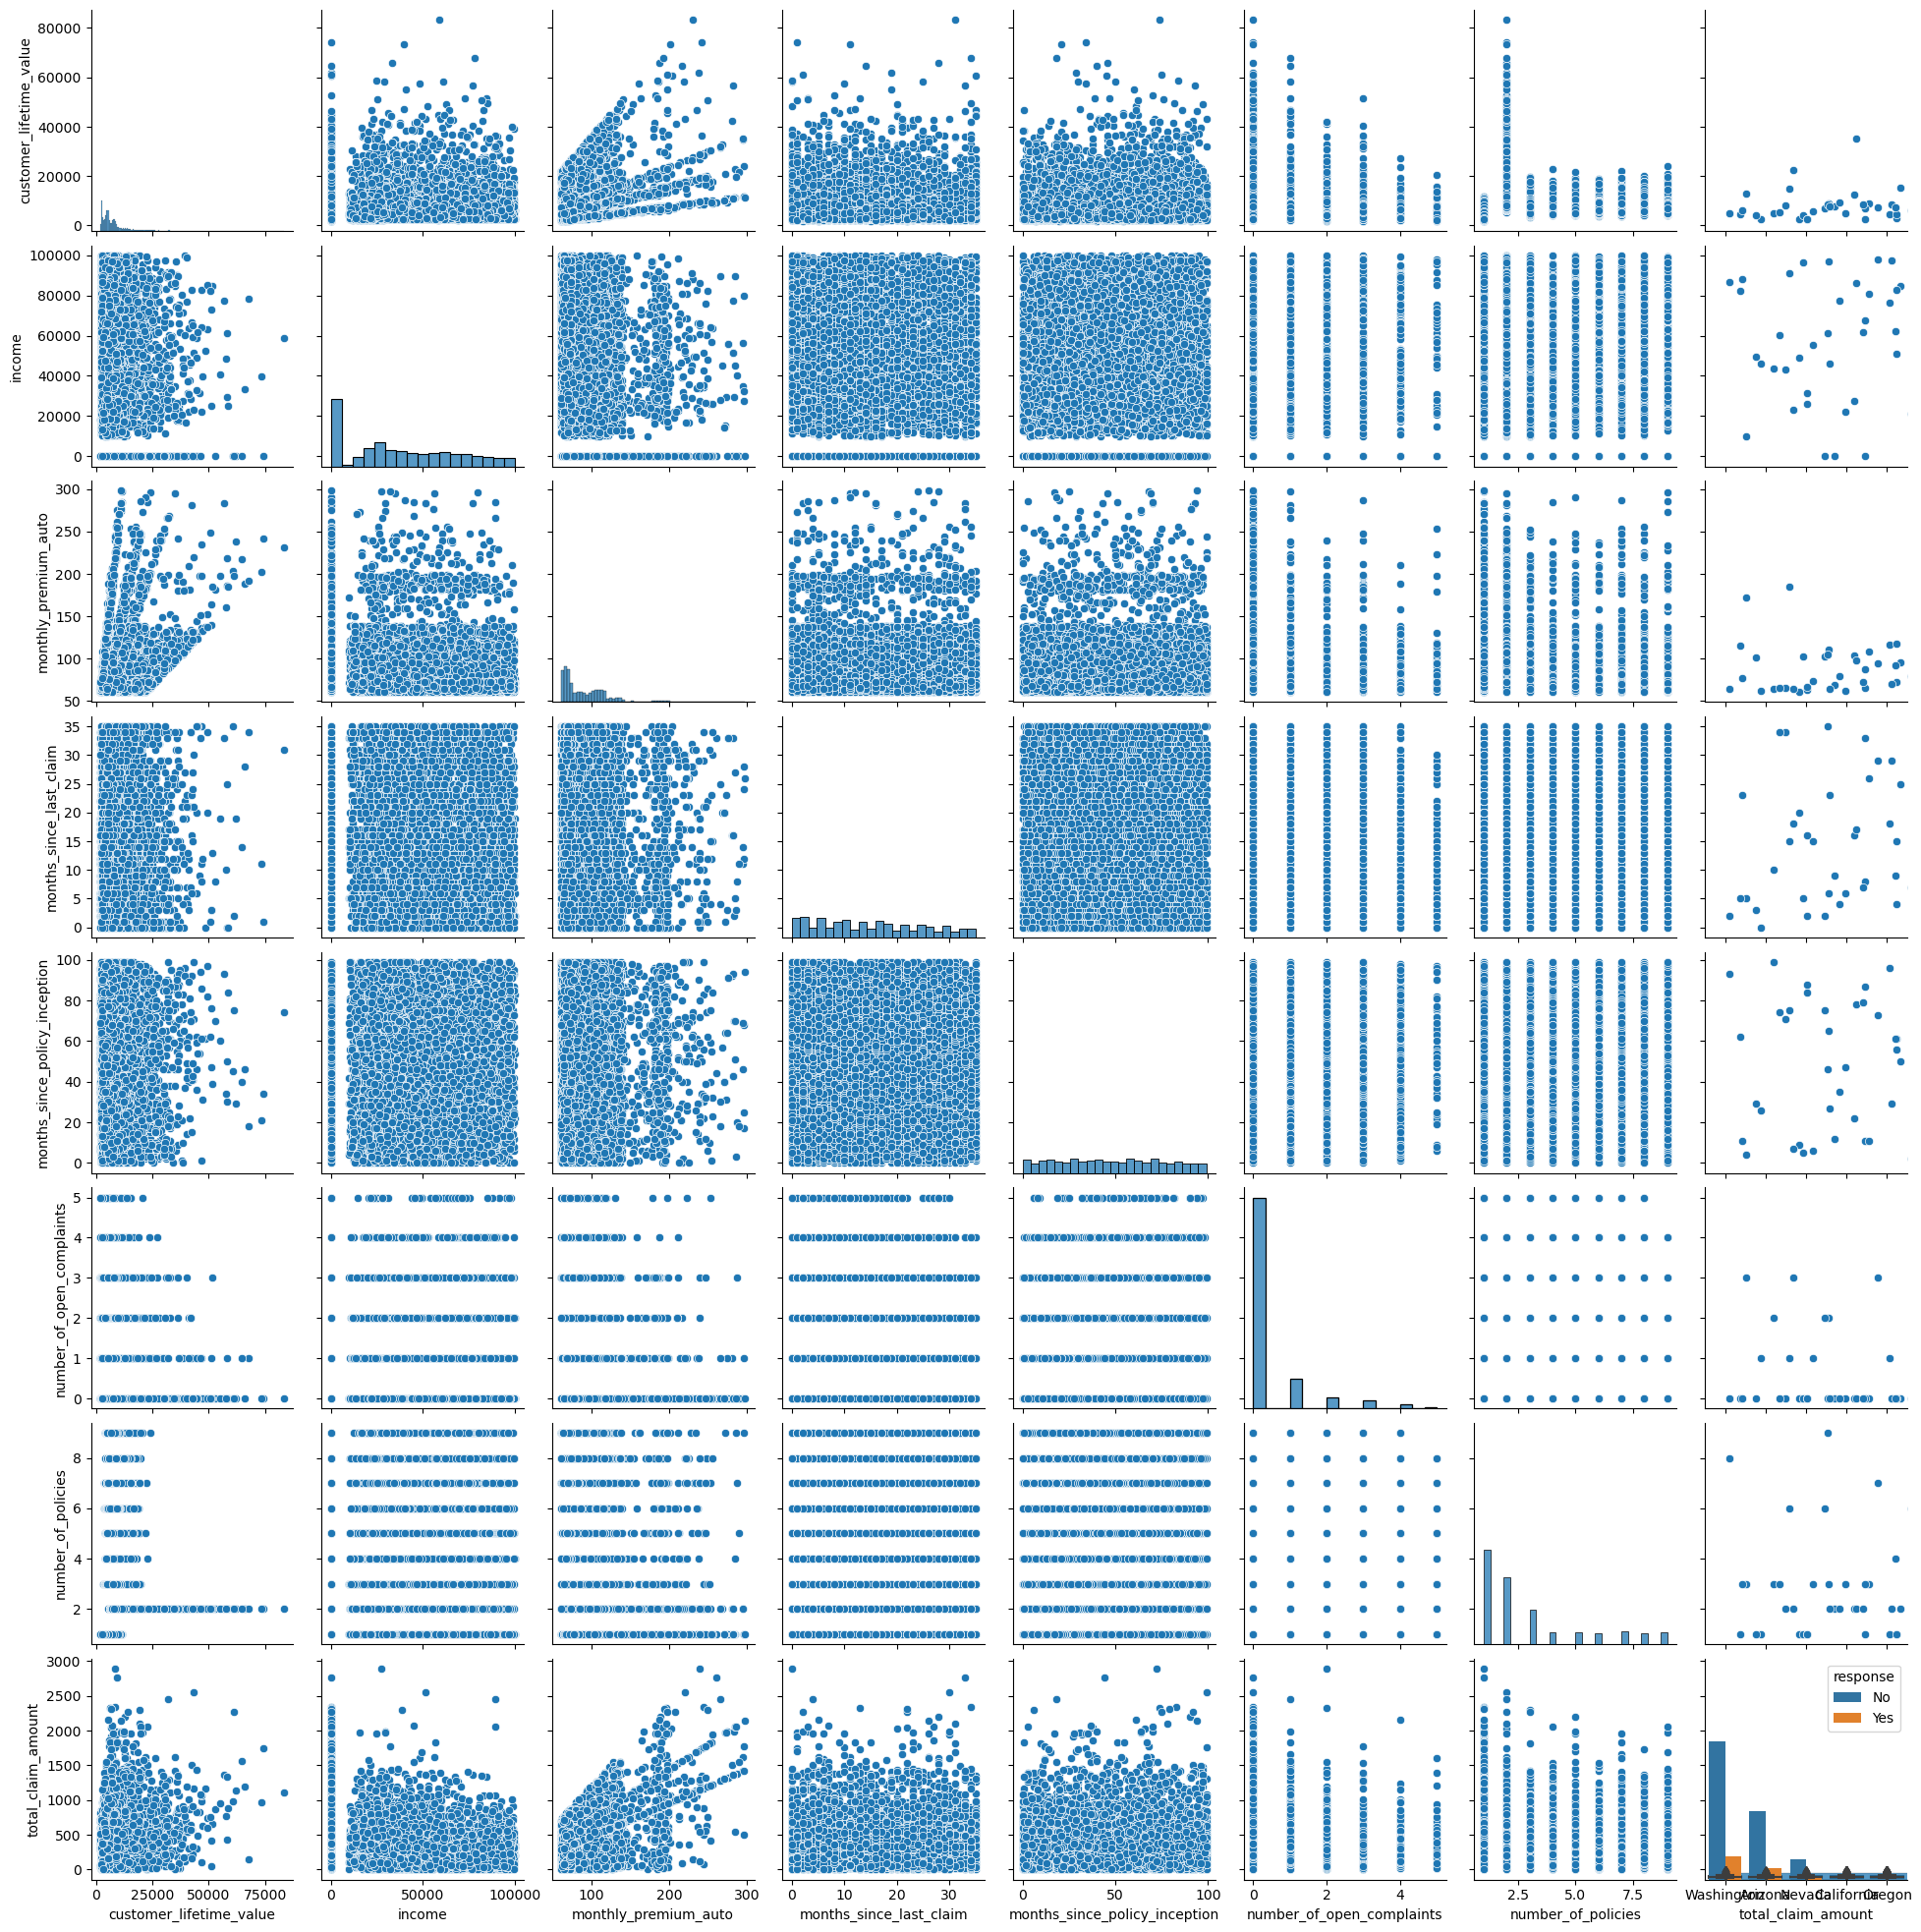

In [55]:
sns.boxplot(x = "state", y = "monthly_premium_auto", data = df, whis = 1.5)
plt.show()


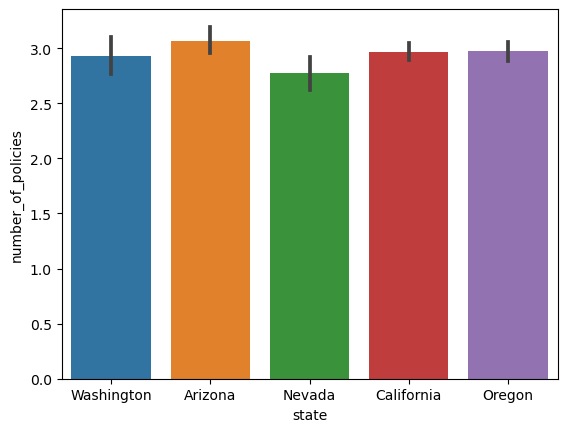

In [56]:
#use barplot to compare monthly premium auto and state
#plt.figure(figsize = (16, 8))

sns.barplot(x = "state", y = "number_of_policies", data = df) 
plt.show()

In [57]:
#remove outliers
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [58]:
sns.boxplot(x = df["income"], whis = 1.5)

<AxesSubplot:xlabel='income'>

### X-y split

In [59]:
# store the target of the analysis in 'y'
# store all features, except the target, in 'x'
y = df["total_claim_amount"]
X = df.drop(["total_claim_amount"], axis = 1)
X.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [60]:
#splitting categories. From the new dataframe 'x' that doesn't include the target, split numerical and categorical
X_numerical = x.select_dtypes(include = [np.number])
X_categorical = x.select_dtypes(include = [np.object])
X_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


### Normalize (numerical)

In [61]:
transformer = MinMaxScaler().fit(X_numerical)
X_minmax = transformer.transform(X_numerical)
print(X_minmax.shape)

(9134, 7)


In [62]:
X_minmax

array([[0.01062925, 0.56284694, 0.03375527, ..., 0.05050505, 0.        ,
        0.        ],
       [0.06240565, 0.        , 0.13924051, ..., 0.42424242, 0.        ,
        0.875     ],
       [0.13495982, 0.48776267, 0.19831224, ..., 0.38383838, 0.        ,
        0.125     ],
       ...,
       [0.07695057, 0.        , 0.10126582, ..., 0.37373737, 0.6       ,
        0.125     ],
       [0.06909758, 0.2194517 , 0.14767932, ..., 0.03030303, 0.        ,
        0.25      ],
       [0.00876645, 0.        , 0.06751055, ..., 0.90909091, 0.        ,
        0.        ]])

In [63]:
X_num_norm = pd.DataFrame(X_minmax, columns = X_numerical.columns)
X_num_norm.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000


In [64]:
sns.distplot(X_num_norm["customer_lifetime_value"])

<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

## The beginning of lab 6

### One Hot/Label Encoding (categorical)

In [65]:
X_categorical

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [66]:
#remove the customer column before encoding
X_categorical.drop(["customer", "effective_to_date"], axis = 1)

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [67]:
X_categorical["policy"].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [68]:
X_categorical.value_counts("policy")

policy
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
dtype: int64

### Encoding with get_dummies

In [69]:
#encoding with get_dummies. Randomly selected the column "policy"
X_cat = pd.get_dummies(X_categorical, columns = ["policy"], drop_first = False)
X_cat

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,policy_Corporate L1,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize,0,0,1,0,0,0,0,0,0
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize,0,0,0,0,0,1,0,0,0
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize,0,0,0,0,0,1,0,0,0
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize,0,1,0,0,0,0,0,0,0
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize,0,0,0,1,0,0,0,0,0
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize,0,0,1,0,0,0,0,0,0
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize,0,1,0,0,0,0,0,0,0
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Offer3,Branch,Four-Door Car,Large,0,0,0,0,1,0,0,0,0


In [ ]:
#concat dataframes
X_numerical = X.select_dtypes(include = np.number)
X = pd.concat([X_categorical, X_cat], axis = 1)
X.head()

In [ ]:
X["policy"].unique()

## Linear Regression

### Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [71]:
#training the model
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'JY45873'

## Model Validation

In [ ]:
#testing the model
predictions  = model.predict(X_test)
predictions.shape

In [ ]:
#Description R2
r2 = r2_score(y_test, predictions)

In [ ]:
#Description MSE
mean_squared_error(y_test, predictions)

In [ ]:
#Description RMSE
RMSE = mean_squared_error(y_test, predictions, squared = False)

In [ ]:
#Description MAE???

In [72]:
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

NameError: name 'r2' is not defined

In [73]:
#### I am no longer sure where I am with this lab :/ Can we go through this lab in the class maybe?